<a href="https://colab.research.google.com/github/lavishKumar1210/Sales-DA/blob/main/amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Load dataset

In [ ]:
amz=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset_colab/amazon.csv',encoding='iso-8859-1',parse_dates=['date'])

# Columns in DataSet

In [ ]:
amz.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [ ]:
amz.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# display first 5 rows of dataset

In [ ]:
amz.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# display last 5 rows of dataset

In [ ]:
amz.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# find shape of the dataset

In [ ]:
amz.shape

(6454, 5)

In [ ]:
print('No of rows in dataset : ',amz.shape[0])
print('No of columns in dataset : ', amz.shape[1])

No of rows in dataset :  6454
No of columns in dataset :  5


# fetch all info about data set

In [ ]:
amz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


#Check for duplicates

In [ ]:
dup=amz.duplicated().any()

In [ ]:
print('Is duplicates are there : ',dup)

Is duplicates are there :  True


# No of duplicates

In [ ]:
no_of_dup=amz.duplicated().sum()
no_of_dup

32

# drop duplicates

In [ ]:
amz=amz.drop_duplicates()

# no of duplicates are

In [ ]:
amz.shape

(6422, 5)

In [ ]:
6454-6422

32

# check again for duplicates

In [ ]:
dup2=amz.duplicated().any()
print("Is there any duplicates " , dup2)

Is there any duplicates  False


# check for null values

In [ ]:
amz.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# get overall stats of dataset

In [ ]:
amz.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


# rename month to english

In [ ]:
amz['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [ ]:
amz['month_eng']=amz['month'].map({'Janeiro':'jan',
                                   'Fevereiro':'feb',
                                   'Março':'march',
                                   'Abril':'april',
                                   'maio':'may',
                                   'Junho':'jun',
                                   'Julho':'july',
                                   'Agosto':'august',
                                   'Setembro':'sep',
                                   'Outubro':'oct',
                                   'Novembro':'nov',
                                   'Dezembro':'dec'})


In [ ]:
amz['month_eng'].unique()

array(['jan', 'feb', 'march', 'april', nan, 'jun', 'july', 'august',
       'sep', 'oct', 'nov', 'dec'], dtype=object)

In [ ]:
amz.head()

,year,state,month,number,date,month_eng
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


# total no of fires

In [ ]:
print('Total no of fires registered',len(amz))

Total no of fires registered 6422


# In which maximum no of fires are registered

In [ ]:
amz.groupby(by='month_eng')['number'].sum().sort_values(ascending=False)

month_eng
july      92319.113
oct       88681.579
august    88050.435
nov       85508.054
sep       58578.305
dec       57535.480
jun       55997.675
jan       47681.844
feb       30839.050
march     30709.405
april     28184.770
Name: number, dtype: float64

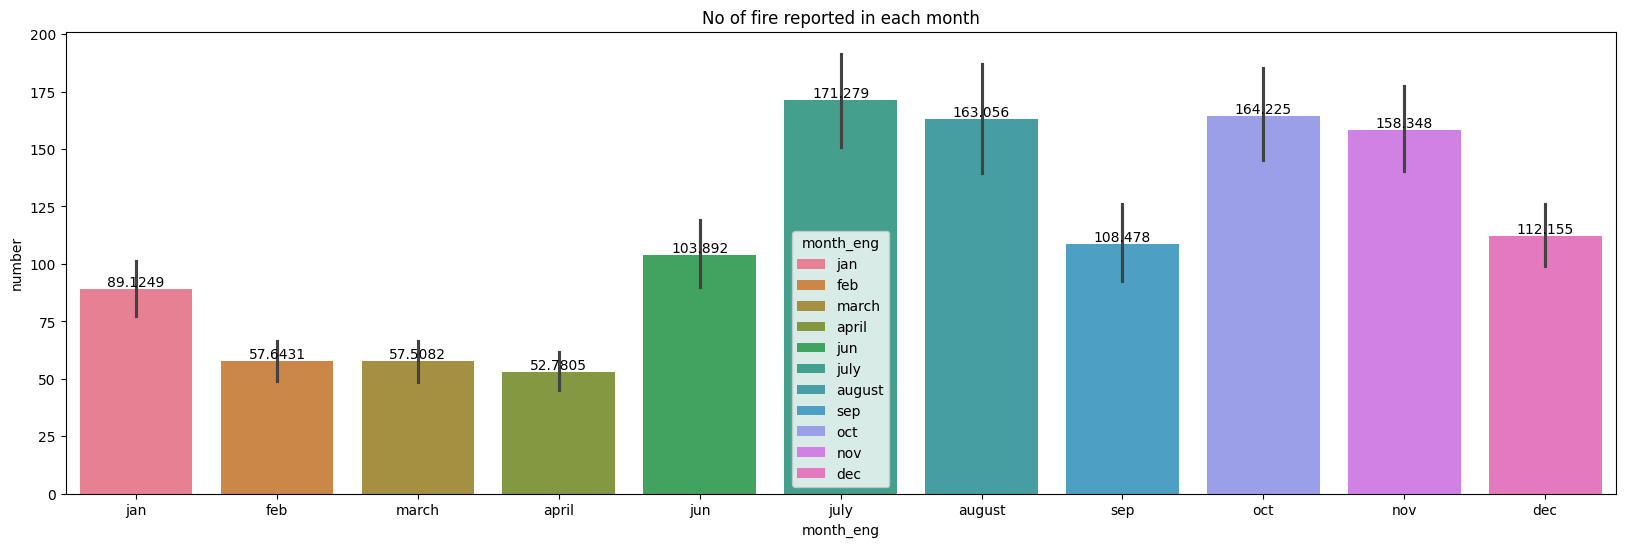

In [ ]:
plt.figure(figsize=(20,6))
ax=sns.barplot(x='month_eng',y='number',data=amz,hue='month_eng')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of fire reported in each month")
plt.show()

In [ ]:
fire=amz.groupby('month_eng')['number'].mean().sort_values(ascending=False)
fire=fire.reset_index()

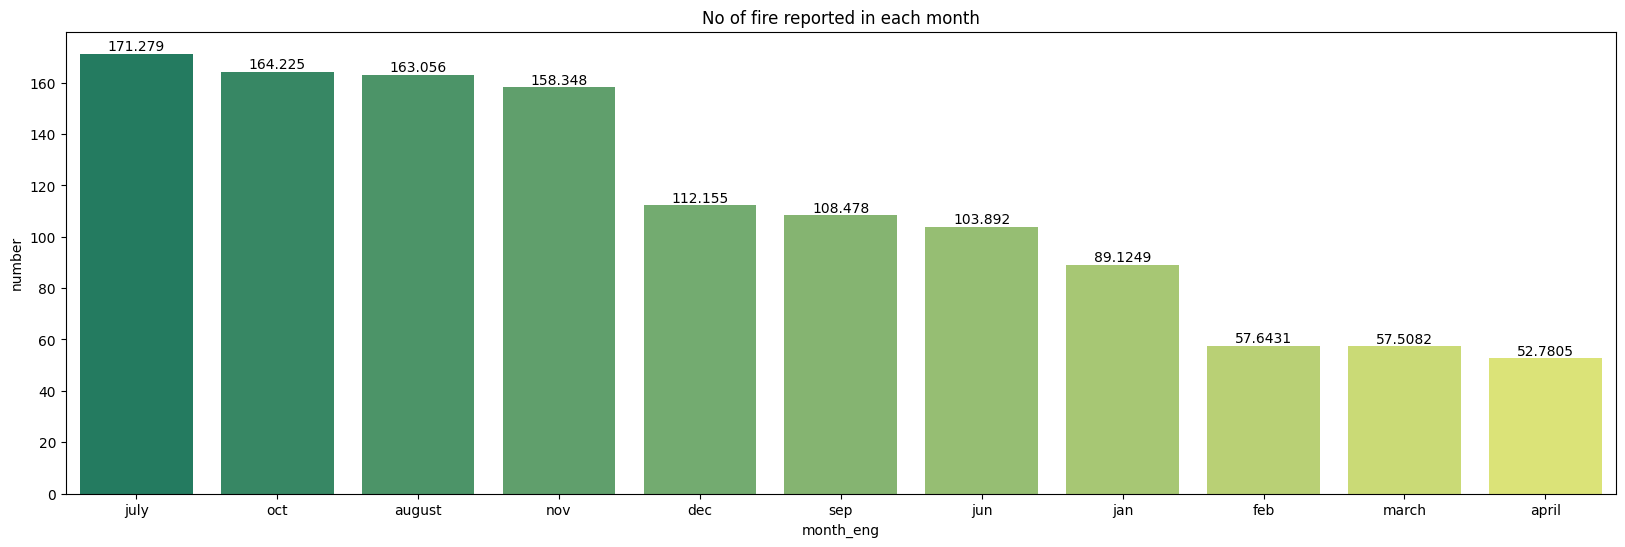

In [ ]:
plt.figure(figsize=(20,6))
ax=sns.barplot(x='month_eng', y='number', data=fire, hue='month_eng',palette='summer')
# Label each bar with no of cases associated with it
for i in ax.containers:
    ax.bar_label(i)

plt.title("No of fire reported in each month")
plt.show()

# in which year maximum fires are reported

In [ ]:
amz.groupby('year')['number'].mean().sort_values(ascending=False).reset_index()

,year,number
0,2003,131.977389
1,2016,130.284657
2,2015,127.186086
3,2012,123.718704
4,2017,123.714946
5,2014,122.287602
6,2009,121.102718
7,2004,119.040752
8,2002,115.403086
9,2010,114.313114


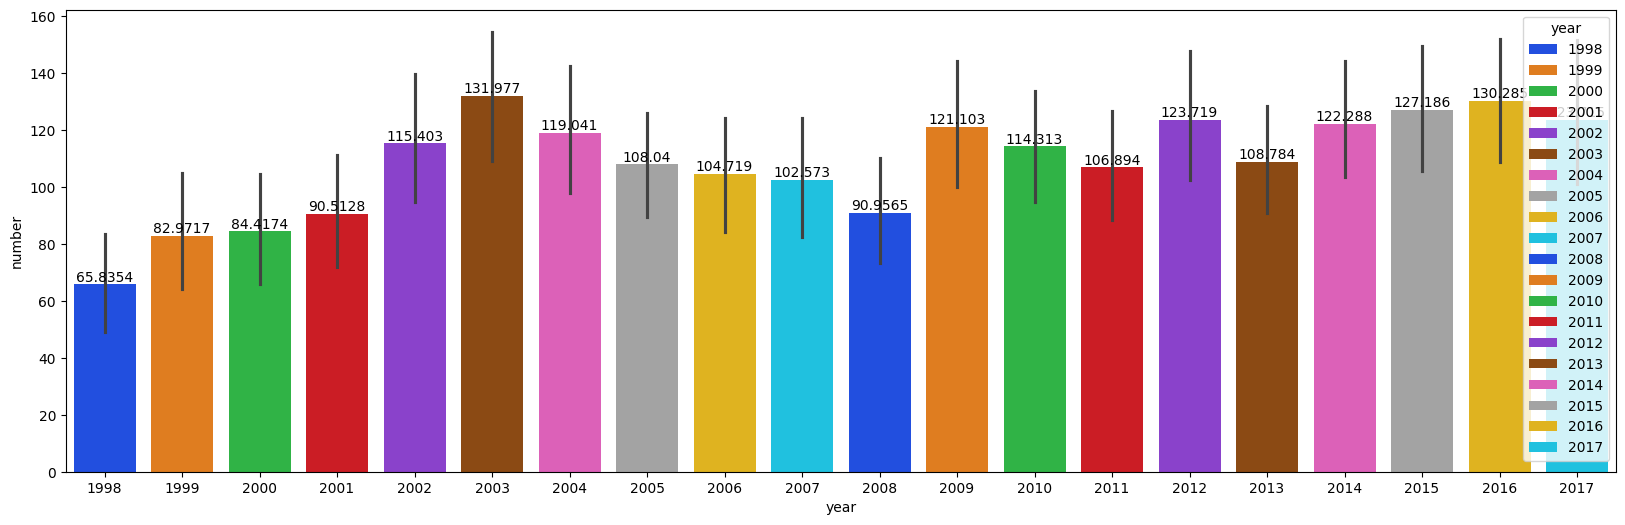

In [ ]:
plt.figure(figsize=(20,6))
p=sns.barplot(x='year',y='number',data=amz,hue='year',palette='bright')
for i in p.containers:
  p.bar_label(i)
plt.show()

In [ ]:
f_year=amz.groupby('year')['number'].mean().sort_values(ascending=False)
f_year=f_year.reset_index()
f_year

,year,number
0,2003,131.977389
1,2016,130.284657
2,2015,127.186086
3,2012,123.718704
4,2017,123.714946
5,2014,122.287602
6,2009,121.102718
7,2004,119.040752
8,2002,115.403086
9,2010,114.313114


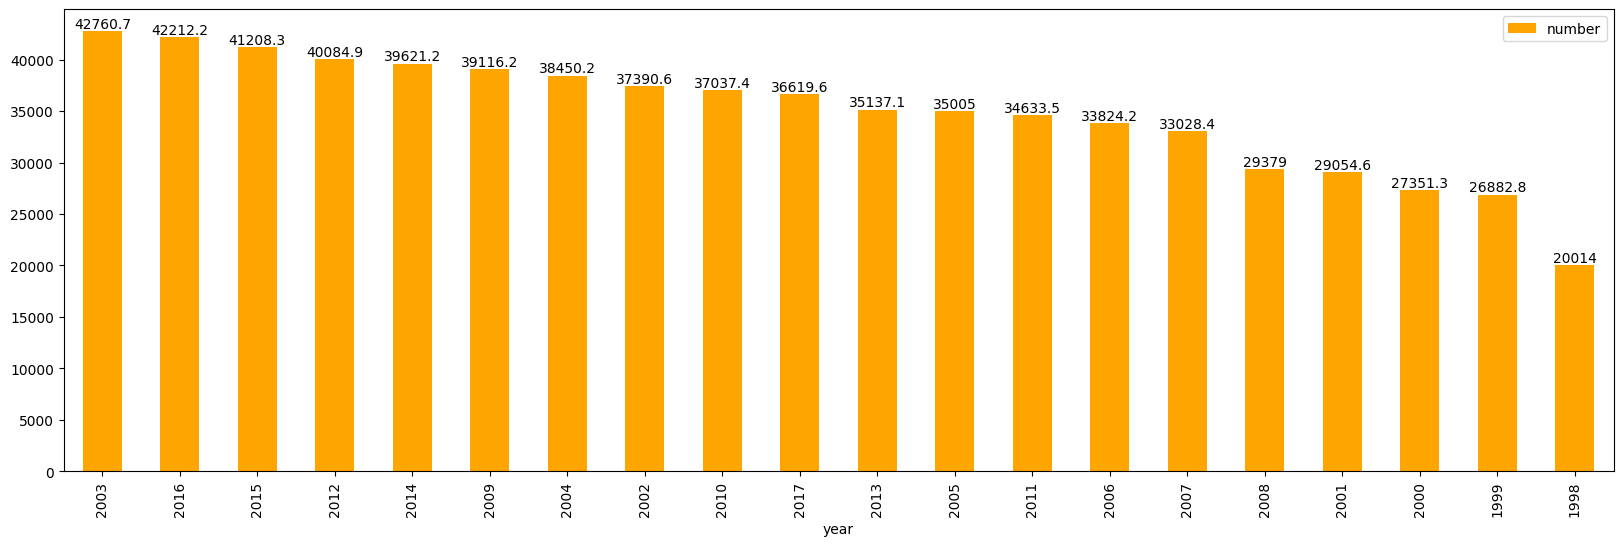

In [ ]:
ax=f_year.plot(kind='bar',x='year',y='number',figsize=(20,6),color='orange')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

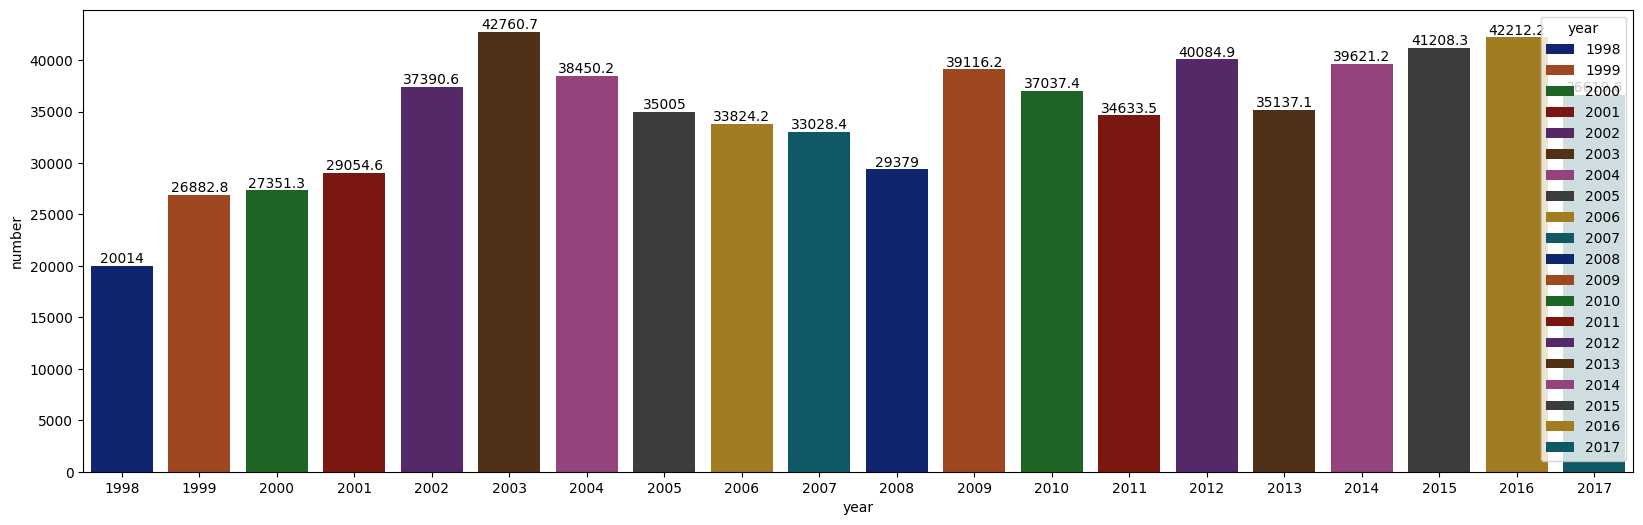

In [ ]:
plt.figure(figsize=(20,6))
ax=sns.barplot(x='year',y='number',data=f_year,hue='year',palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

# In which state maximum fires were reported

In [ ]:
amz.groupby('state')['number'].sum().sort_values(ascending=False).reset_index()

,state,number
0,Mato Grosso,96246.028
1,Paraiba,52426.918
2,Sao Paulo,51121.198
3,Rio,45094.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


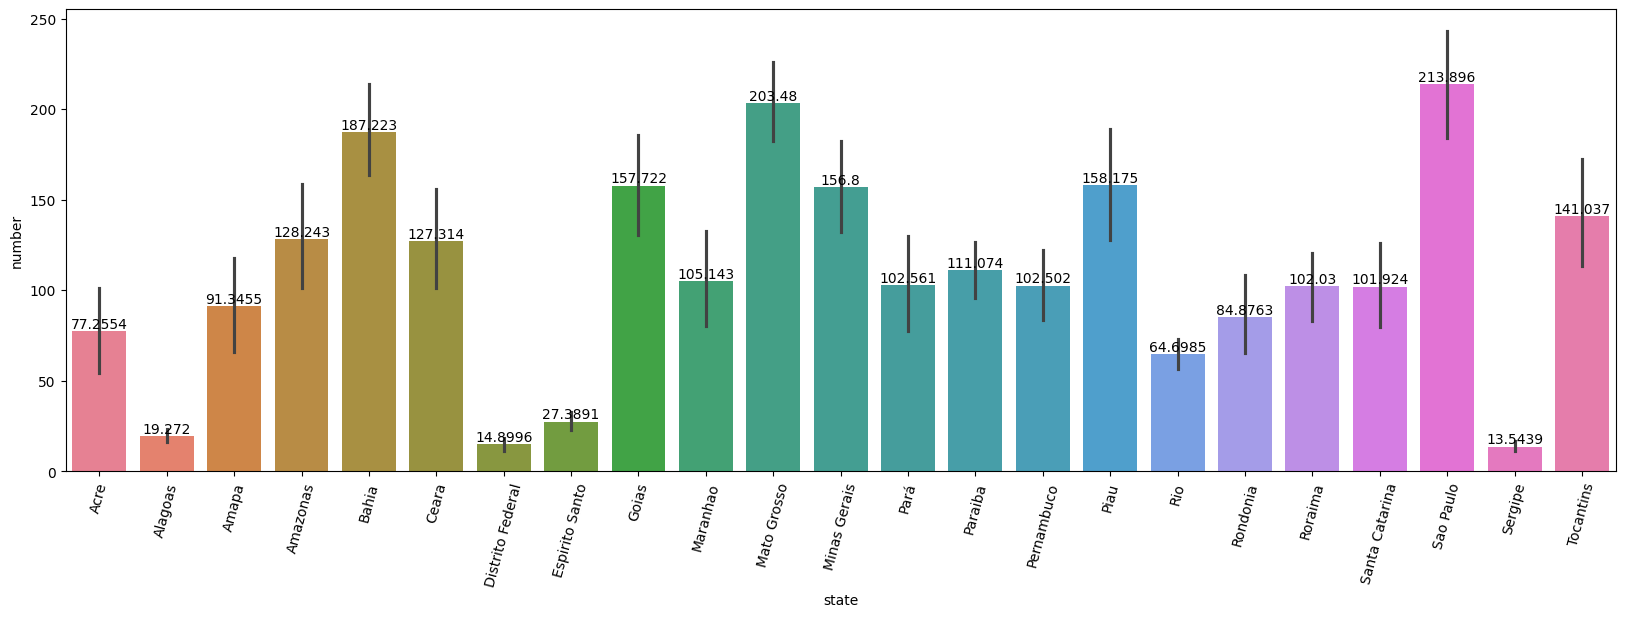

In [ ]:
plt.figure(figsize=(20,6))
q=sns.barplot(x='state',y='number',data=amz,hue='state')
for i in q.containers:
  q.bar_label(i)
plt.xticks(rotation=75)
plt.show()

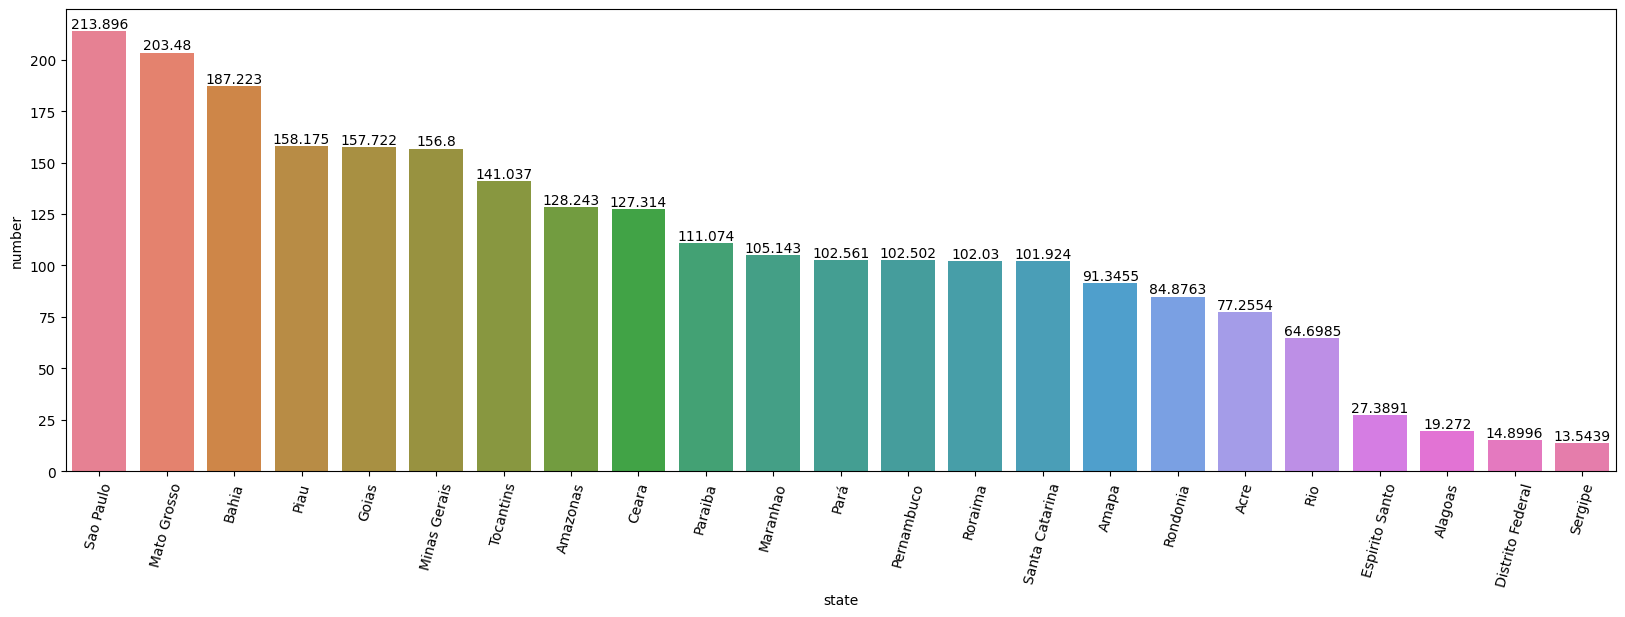

In [ ]:
at=amz.groupby('state')['number'].mean().sort_values(ascending=False)
at=at.reset_index()
plt.figure(figsize=(20,6))
ax=sns.barplot(x='state',y='number',data=at,hue='state')
for i in ax.containers:
  ax.bar_label(i)
plt.xticks(rotation=75)
plt.show()

# TOTAL  fires reported in amazonas

In [ ]:
len(amz[amz['state']=='Amazonas'])

239

In [ ]:
round(amz[amz['state']=='Amazonas']['number'].mean(),3)

128.243

# Display number of fires were reported in amazonas (year Wise)

In [ ]:
dt=amz[amz['state']=='Amazonas']

In [ ]:
dt.head()

,year,state,month,number,date,month_eng
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan


In [ ]:
dt2=dt.groupby('year')['number'].sum().sort_values(ascending=False).reset_index()
dt2.head(3)

,year,number
0,2002,2852.000
1,2008,2717.000
2,2014,2385.909


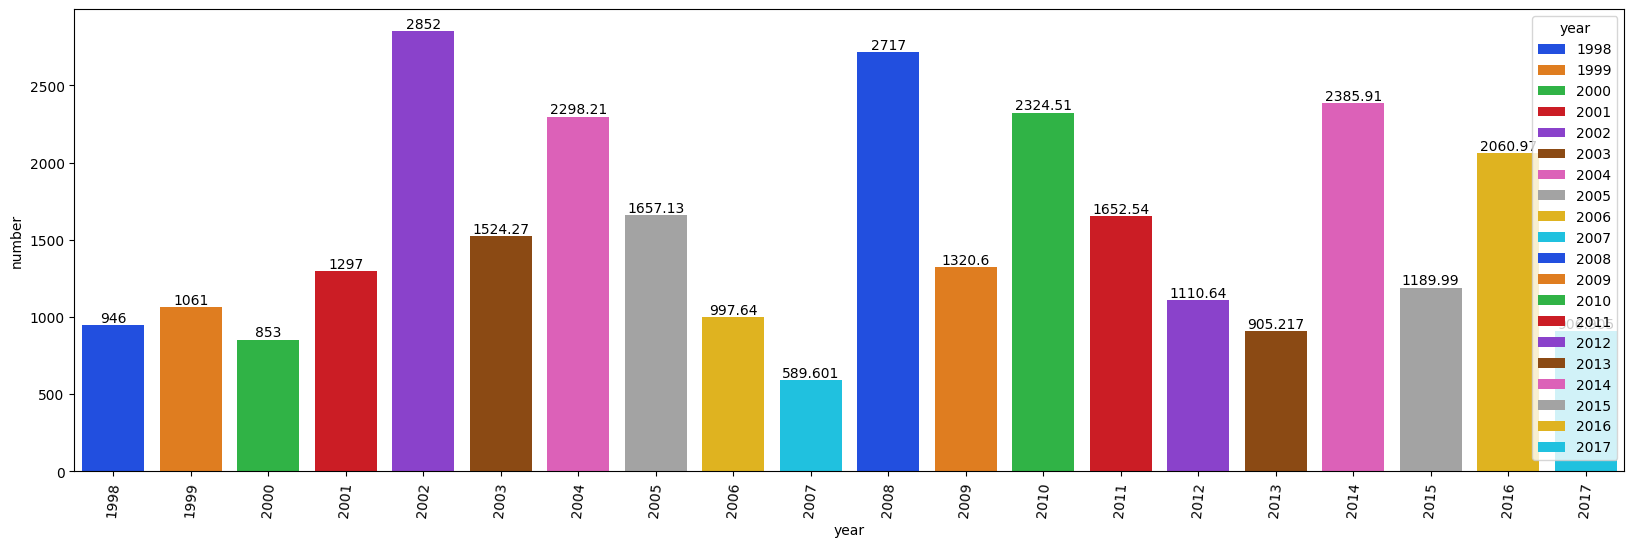

In [ ]:
plt.figure(figsize=(20,6))
a=sns.barplot(x='year',y='number',data=dt2,hue='year',palette='bright')
for i in a.containers:
  a.bar_label(i)
plt.xticks(rotation=85)
plt.show()

# Display number of fires were reported in amazonas (day Wise)

In [ ]:
dt3=amz[amz['state']=='Amazonas']

In [ ]:
day=dt3.groupby(dt3['date'].dt.dayofweek)['number'].sum()

In [ ]:
import calendar
day.index= [calendar.day_name[x] for x in range(0,7)]
day=day.reset_index()
day

,level_0,index,number
0,Monday,Monday,1886.601
1,Tuesday,Tuesday,6474.217
2,Wednesday,Wednesday,3910.177
3,Thursday,Thursday,5754.802
4,Friday,Friday,5446.480
5,Saturday,Saturday,4162.666
6,Sunday,Sunday,3015.186


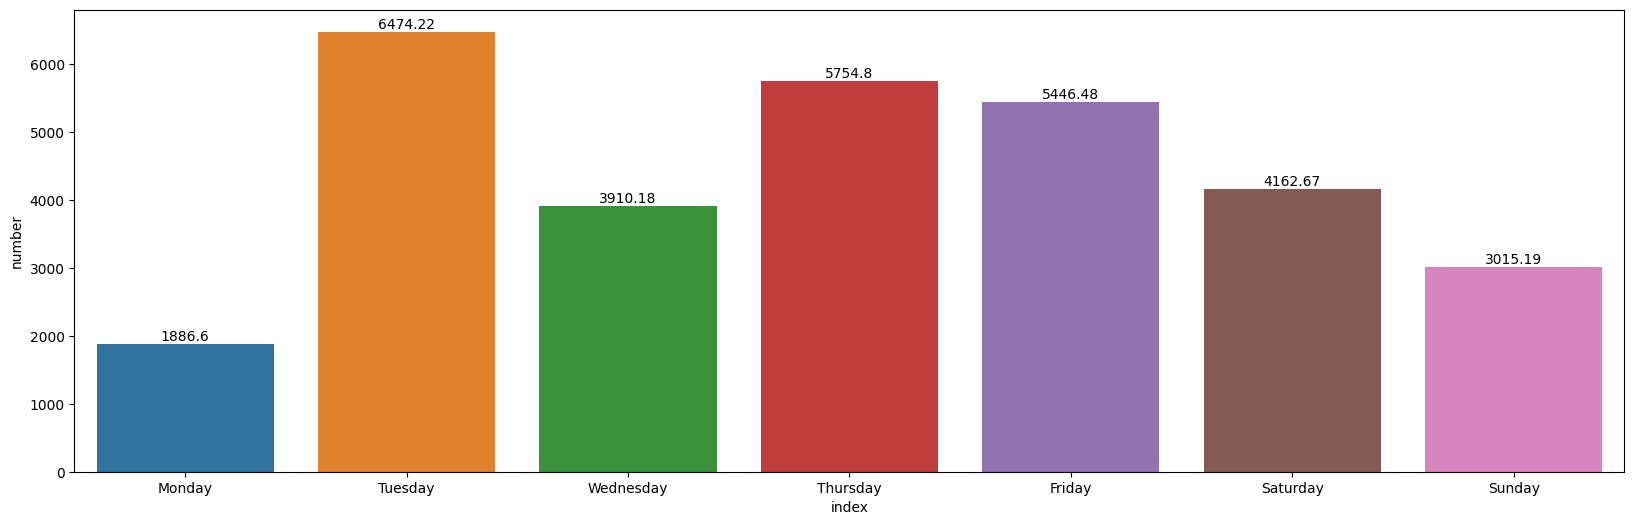

In [ ]:
plt.figure(figsize=(20,6))
e=sns.barplot(x='index',y='number',data=day,hue='index')
for i in e.containers:
  e.bar_label(i)
plt.show()

# display fires reported in 2015 and visualise using months

In [ ]:
dt5=amz[amz['year']==2015]
dt5['number'].mean()

127.1860864197531

In [ ]:
dt6=dt5.groupby('month_eng')['number'].sum().reset_index()
dt6

,month_eng,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,march,2202.000
8,nov,4034.518
9,oct,4499.525


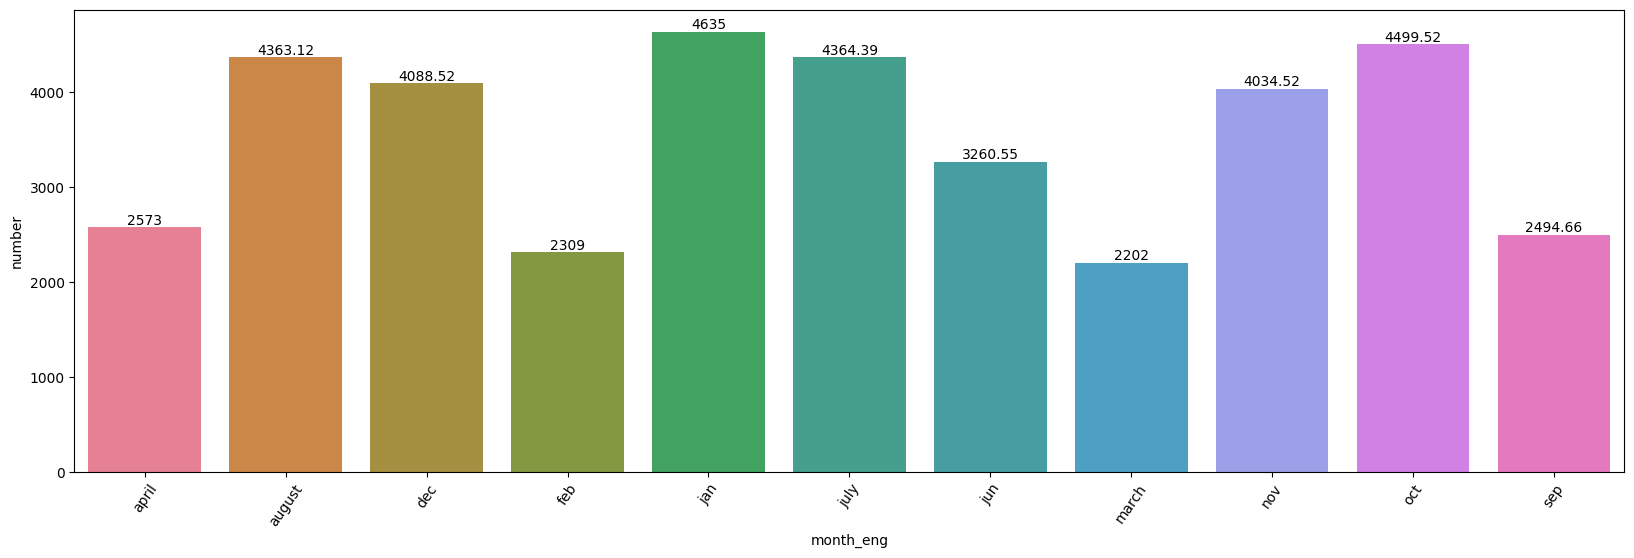

In [ ]:
plt.figure(figsize=(20,6))
t=sns.barplot(x='month_eng',y='number',data=dt6,hue='month_eng')
for i in t.containers:
  t.bar_label(i)
plt.xticks(rotation=55)
plt.show()

# find average of fires reported from highest to lowest

In [ ]:
dt7=amz.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
dt7.head(5)

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841


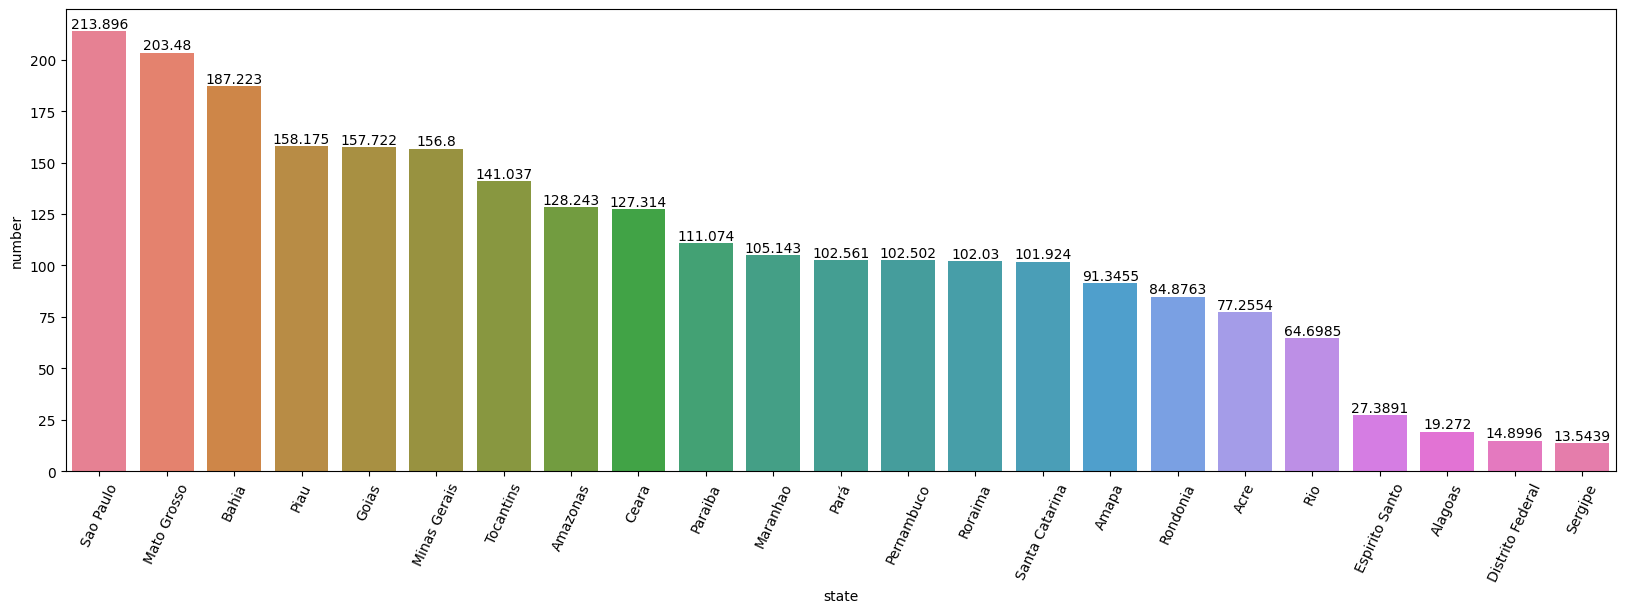

In [ ]:
plt.figure(figsize=(20,6))
y=sns.barplot(x='state',y='number',data=dt7,hue='state')
for i in y.containers:
  y.bar_label(i)
plt.xticks(rotation=65)
plt.show()

# find states where fire were reported in dec month

In [ ]:
amz[amz['month_eng']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)